# Setup  (borrowed from the Ch. 3 notebook)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed as well as Scikit-Learn ≥0.20.

from sklearn.model_selection import cross_val_score

Assignment submitted by: Archit Goyal and Nipurna Dhakal 

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Timing code

(borrowed from https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python)

In [ ]:
from contextlib import contextmanager
from timeit import default_timer

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start
    


In [ ]:
with elapsed_timer() as my_timer:
    sum = 0
    for x in range(1000000):
        sum += x
    print(my_timer())
    for x in range(1000000):
        sum += x
     
print(my_timer())

0.15855030600005193
0.3011220120001781


# MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y = y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
some_digit = X[0]
X_train.shape

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Multiclass classification





In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

In [ ]:
with elapsed_timer() as sgd_timer:
    sgd_clf.fit(X_train_scaled, y_train)
print(f"sgd_clf.fit took {sgd_timer():.3f} secs")  # 380 seconds on my laptop
sgd_clf.predict([some_digit])

sgd_clf.fit took 385.399 secs


array([3], dtype=uint8)

In [ ]:
sgd_clf.score(X_test_scaled, y_test)

0.8933

In [ ]:
sgd_clf.decision_function([some_digit])

array([[ -52074.00622961,  -90932.76755577,  -20253.71519718,
          13700.40693397, -153621.49226805,   -4632.87432725,
        -107360.91391427,  -90145.62086593,    -980.42911341,
         -44100.09135652]])

In [ ]:
# This involves training 3 models - it's going to take a while
cross_val_score(sgd_clf, X_train_scaled[:3000], y_train[:3000], cv=3, scoring="accuracy")

array([0.85 , 0.853, 0.88 ])

#DIFFERENT TIMINGS FOR SVC AND OVR

In [ ]:
from sklearn.svm import SVC

def svc_time(x, y, a, b):
  svm_clf = SVC(gamma="auto", random_state=42)
  with elapsed_timer() as svc_timer:
    svm_clf.fit(x[:a], y[:a]) 
    print(f"svm_clf.fit with {a} data took {svc_timer():.3f} secs")
    #accuracy of the model
    print(cross_val_score(svm_clf, x[a:b], y[a:b], cv=3, scoring="accuracy"))



In [ ]:
svc_time(X_train_scaled, y_train, 5000, 7000)
svc_time(X_train_scaled, y_train, 10000, 12000)
svc_time(X_train_scaled, y_train, 15000, 17000)

svm_clf.fit with 5000 data took 15.199 secs
[0.87406297 0.91004498 0.87837838]
svm_clf.fit with 10000 data took 49.076 secs
[0.91604198 0.91304348 0.86936937]
svm_clf.fit with 15000 data took 94.142 secs
[0.89805097 0.87256372 0.87387387]


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
def ovr_time(x, y, a, b):
  ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
  with elapsed_timer() as ovr_timer:
    ovr_clf.fit(x[:a], y[:a])
    print(f"ovr_clf.fit with {a} data took {ovr_timer():.3f} secs")
    #accuracy of the model
    print(cross_val_score(ovr_clf, x[a:b], y[a:b], cv=3, scoring="accuracy"))



In [ ]:
ovr_time(X_train_scaled, y_train, 5000, 7000)
ovr_time(X_train_scaled, y_train, 10000, 12000)
ovr_time(X_train_scaled, y_train, 15000, 17000)


ovr_clf.fit with 5000 data took 51.335 secs
[0.86806597 0.91154423 0.89039039]
ovr_clf.fit with 10000 data took 165.755 secs
[0.92053973 0.90554723 0.85885886]
ovr_clf.fit with 15000 data took 337.554 secs
[0.88755622 0.87406297 0.86186186]




#Trying out the Random Forest Classifier and Minst Importance feature 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train_scaled[:10000], y_train[:10000]) 


In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


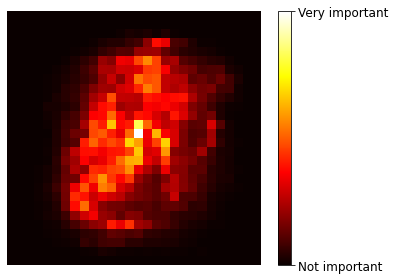

In [ ]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

#Slicing and reshaping the data 

In [ ]:
#reshaping the 1d array to 2d
Xp = X_train_scaled.reshape(60000,28, 28)
Xp = Xp[:20000]

#removing 2 rows and columns each side
X2= Xp[0, 2:-2, 2:-2]
print(Xp.shape)
for i in range (1, Xp.shape[0]):
    X2 = np.append(X2, Xp[i, 2:-2, 2:-2])
X2 = X2.reshape(20000,576)
print(X2.shape)

#removing 5 rows and columns each side
X5 = Xp[0, 5:-5, 5:-5]
for i in range (1, Xp.shape[0]):
  X5 = np.append(X5, Xp[i, 5:-5, 5:-5])
X5 = X5.reshape(20000,324)
print(X5.shape)

ovr_time(X2, y_train, 5000, 7000)
ovr_time(X2, y_train, 10000, 12000) 
ovr_time(X2, y_train, 15000, 17000)

ovr_time(X5, y_train, 5000, 7000)
ovr_time(X5, y_train, 10000, 12000)
ovr_time(X5, y_train, 15000, 17000)

(20000, 28, 28)
(20000, 576)
(20000, 324)
ovr_clf.fit with 5000 data took 37.566 secs
[0.88455772 0.92503748 0.8963964 ]
ovr_clf.fit with 10000 data took 123.405 secs
[0.92053973 0.91004498 0.87087087]
ovr_clf.fit with 15000 data took 250.486 secs
[0.89805097 0.88905547 0.87837838]
ovr_clf.fit with 5000 data took 18.522 secs
[0.91754123 0.94602699 0.90540541]
ovr_clf.fit with 10000 data took 59.032 secs
[0.92803598 0.92353823 0.9009009 ]
ovr_clf.fit with 15000 data took 116.473 secs
[0.92503748 0.89205397 0.91591592]


In [ ]:
import numpy.ma as ma
#selecting X features according to importance

X_important_features = ma.masked_where(rnd_clf.feature_importances_ > 1.350000e-03, rnd_clf.feature_importances_ )
X_important_features.mask

X_importance_reduction = np.zeros((60000, 255))

X_masking = X_train_scaled.copy()
print(X_masking.shape)
for m in range (0, 60000):
    X_mask_temp = X_masking[m]
    X_importance_reduction[m] = np.array(X_mask_temp[X_important_features.mask])

X_importance_reduction

In [ ]:
ovr_time(X_importance_reduction, y_train, 5000, 7000)
ovr_time(X_importance_reduction, y_train, 10000, 12000)
ovr_time(X_importance_reduction, y_train, 15000, 17000)


ovr_clf.fit with 5000 data took 13.522 secs
[0.91304348 0.94452774 0.91291291]
ovr_clf.fit with 10000 data took 44.204 secs
[0.91904048 0.92953523 0.8993994 ]
ovr_clf.fit with 15000 data took 87.302 secs
[0.92503748 0.89805097 0.91741742]


In [ ]:
#PCA to reduce the dimensionality of the space

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_train_scaled)

pca.components_.T[:, 0]
pca.explained_variance_ratio_

ovr_time(X2D, y_train, 5000, 7000)
ovr_time(X2D, y_train, 10000, 12000)
ovr_time(X2D, y_train, 15000, 17000)

ovr_clf.fit with 5000 data took 6.456 secs
[0.30884558 0.31034483 0.2957958 ]
ovr_clf.fit with 10000 data took 23.213 secs
[0.33433283 0.33283358 0.33033033]
ovr_clf.fit with 15000 data took 50.718 secs
[0.31034483 0.29235382 0.34534535]


In [ ]:
#PCA with 80% variance

pca2 = PCA(n_components=0.8)
X_reduced = pca2.fit_transform(X_train_scaled)

X_reduced.shape
pca2.explained_variance_ratio_

ovr_time(X_reduced, y_train, 5000, 7000)
ovr_time(X_reduced, y_train, 10000, 12000)
ovr_time(X_reduced, y_train, 15000, 17000)

ovr_clf.fit with 5000 data took 24.775 secs
[0.87256372 0.89055472 0.87837838]
ovr_clf.fit with 10000 data took 91.075 secs
[0.88905547 0.88155922 0.84984985]
ovr_clf.fit with 15000 data took 275.326 secs
[0.87406297 0.86056972 0.85435435]
